## Observations and Insights 

1. Capomulin and Ramicane seem to be similarly effective in the study with Capomulin being the most effective overall.  

2. Based on the scatter plot, it seems that the heaver the mice weighed, the less the drug regimen was effective in shrinking their tumor mass.

3. For the individual mouse sample for the line graph it seemed that between day 10 and 20 the tumor shrank rapidly on the drug Capomulin. It would be interesting to observe that data for all of the mice and see if that is when most of the tumor regression happens for all of them. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
mouse_metadata_df.head()

# Combine the data into a single dataset
#merge 'outer' for this set
data_merge = pd.merge(mouse_metadata_df, study_results_df,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
data_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(data_merge["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse ID g989 is the duplicate
mouse_duplicate = data_merge.loc[data_merge[["Mouse ID", "Timepoint"]].duplicated(),"Mouse ID"]
mouse_duplicate

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data=pd.DataFrame(mouse_duplicate)
duplicate_data

,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_study = data_merge[data_merge["Mouse ID"].isin(mouse_duplicate)==False]
mice_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame
#dropped the duplicate
new_mouse_count=mice_study["Mouse ID"].value_counts()
new_mouse_count

r554    10
c559    10
e476    10
a203    10
g316    10
        ..
b447     1
o848     1
n482     1
f932     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_regimen=mice_study.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumor = tumor_regimen['Tumor Volume (mm3)'].mean()
median_tumor = tumor_regimen['Tumor Volume (mm3)'].median()
var_tumor = tumor_regimen['Tumor Volume (mm3)'].var()
std_tumor = tumor_regimen['Tumor Volume (mm3)'].std()
sem_tumor = tumor_regimen['Tumor Volume (mm3)'].sem()

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#arrange into a Data Frame
tumor_regimen=pd.DataFrame({
    "Mean tumor vol.": mean_tumor,
    "Median tumor vol.": median_tumor,
    "Tumor vol. variance":var_tumor,
    "Tumor vol. standard deviation": std_tumor,
    "Tumor standard error of the mean": sem_tumor,})
tumor_regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_reg2 = mice_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_reg2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
#create list to view drug regimen counts 
pd_mice = mice_study["Drug Regimen"].value_counts()
pd_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

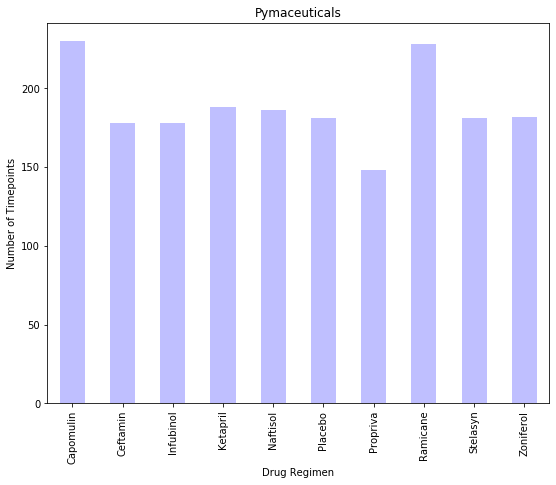

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pd_mice =  mice_study.groupby(["Drug Regimen"])["Mouse ID"].count()
pd_mice.plot.bar(figsize = (9,7), facecolor = "blue", alpha=0.25)


plt.title("Pymaceuticals")
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")

plt.show()

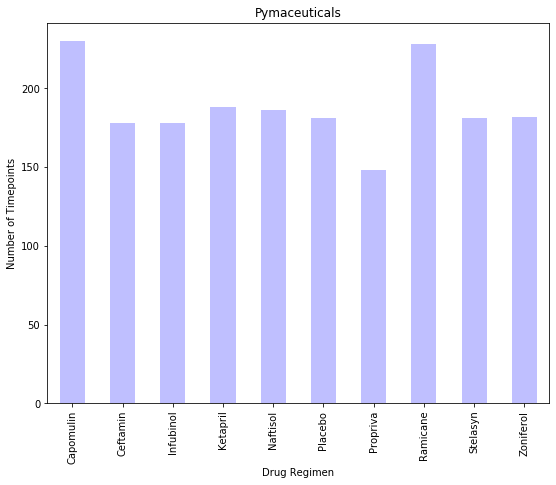

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_bar = mice_study.groupby(["Drug Regimen"])["Mouse ID"].count()


plt.figure(figsize=(9,7))
x_axis = np.arange(len(timepoint_bar))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ramicane","Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo",
                           "Infubinol","Ceftamin","Propriva"])

#plots the bar graph
timepoint_bar.plot(kind="bar", facecolor="blue", alpha=0.25,)


# get total regimen data for the bar chart
timepoint_bar=mice_study

#add labels
plt.title("Pymaceuticals")
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")


plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Generate DF to calculate male/female mice and use the data to create a pie chart
gender_pie=mice_study.groupby("Sex")

gender_pie = pd.DataFrame(gender_pie['Sex'].count())
gender_pie.head()

,Sex
Sex,
Female,922
Male,958


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9038119128>],
      dtype=object)

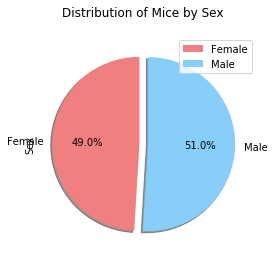

In [13]:
colors= ["lightcoral", "lightskyblue"]
gender_pie.plot(kind="pie",title="Distribution of Mice by Sex", autopct="%1.1f%%", 
                shadow=True, startangle=90, colors=colors, explode=(0.1,0), subplots=True)

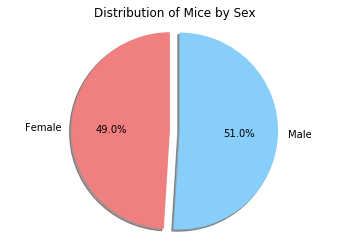

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie_plt=mice_study["Sex"].count()


genders=["Female", "Male"]
colors=["lightcoral", "lightskyblue"]
explode=(0.1,0)
size=[1,1.04]

plt.title("Distribution of Mice by Sex")
plt.pie(size, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90,)
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#review overall data 
mice_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Start by getting the last (greatest) timepoint for each mouse
last_tmpoint=mice_study.groupby(["Mouse ID"])["Timepoint"].max()
last_tmpoint_df=pd.DataFrame(last_tmpoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge 'right'
last_tumvol=pd.merge(mice_study,last_tmpoint_df, on=("Mouse ID", "Timepoint",), how="right")
last_tumvol



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = last_tmpoint.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

# Locate the rows which contain mice on each drug and get the tumor volumes
    
# add subset 
    
# Determine outliers using upper and lower bounds
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} "
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

SyntaxError: invalid syntax (<ipython-input-17-91b324ffba80>, line 20)

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [25]:
#chose mouse for the graph ased on the .sample generator and plugged number in code 
cap_line=mice_study.loc[mice_study["Drug Regimen"]=="Capomulin"]
cap_line.sample()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#chose mouse with id u364 based on the .sample generator 
cap_line = mice_study.loc[mice_study["Mouse ID"] == "u364",:]
cap_line.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2
99,u364,Capomulin,Male,18,17,20,40.343948,2


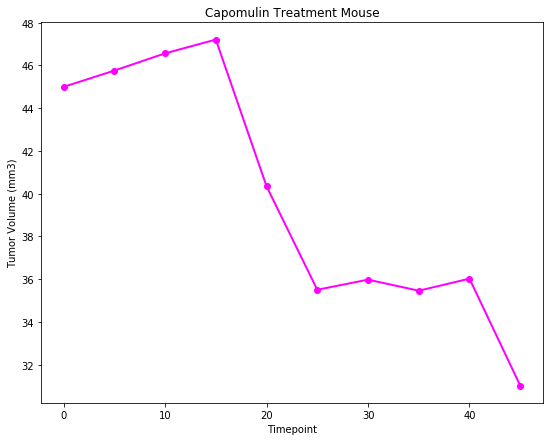

In [27]:
x_axis = cap_line["Timepoint"]
y_axis = cap_line["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(9, 7))
plt.title('Capomulin Treatment Mouse')
plt.plot(x_axis, y_axis,linewidth=2, marker="o",color="magenta")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [20]:
#create a sample mouse to base the scatter plot on
cap_mouse=mice_study.loc[mice_study["Drug Regimen"]=="Capomulin"]
cap_mouse.sample()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
343,v923,Capomulin,Female,19,21,10,39.848223,0


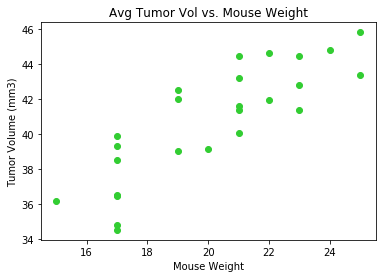

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = mice_study[mice_study['Drug Regimen'] == 'Capomulin']
vol = weight.groupby(["Mouse ID"]).mean()

plt.scatter(vol["Weight (g)"],vol["Tumor Volume (mm3)"], color="limegreen", marker='o') 
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Vol vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_mouse=pd.DataFrame(cap_mouse)
data=pd.DataFrame(cap_mouse)

data["Tumor Volume (mm3)"] = correlation_mouse
correlation_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,s185,0
11,s185,Capomulin,Female,3,17,5,s185,0
12,s185,Capomulin,Female,3,17,10,s185,0
13,s185,Capomulin,Female,3,17,15,s185,0
14,s185,Capomulin,Female,3,17,20,s185,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,i557,1
1452,r157,Capomulin,Male,22,25,0,r157,0
1453,r157,Capomulin,Male,22,25,5,r157,0
1454,r157,Capomulin,Male,22,25,10,r157,0


In [23]:
x_values = data["Weight (g)"].mean()
y_values = data["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

TypeError: Could not convert s185s185s185s185s185s185s185s185s185s185x401x401x401x401x401x401x401x401x401x401m601m601m601m601m601m601m601m601m601m601f966f966f966f966f966u364u364u364u364u364u364u364u364u364u364y793y793y793y793y793y793y793y793y793y793r554r554r554r554r554r554r554r554r554r554m957m957m957m957m957m957m957m957m957m957t565t565t565t565t565t565t565t565t565t565i738i738i738i738i738i738i738i738i738i738w914w914w914w914w914w914w914w914w914w914g288g288g288g288g288g288g288g288g288g288l897l897l897l897l897l897l897l897l897l897b742b742b742b742b742b742b742b742b742b742b128b128b128b128b128b128b128b128b128b128j246j246j246j246j246j246j246j246j119j119j119j119j119j119j119j119j119j119w150w150w150v923v923v923v923v923v923v923v923v923v923g316g316g316g316g316g316g316g316g316g316s710s710s710s710s710s710s710s710s710s710l509l509l509l509l509l509l509l509l509l509r944r944r944r944r944r944r944r944r944r944i557i557i557i557i557i557i557i557i557i557r157r157r157r157 to numeric